## Observations and Insights

## Dependencies and starter code

In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


# Combine the data into a single dataset


In [101]:
mouse_metadata.dtypes

Mouse ID        object
Drug Regimen    object
Sex             object
Age_months       int64
Weight (g)       int64
dtype: object

In [102]:
study_results.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [103]:
#This is the combined Dataset
mouse_table = pd.merge(mouse_metadata, study_results, how = "outer", on=['Mouse ID', 'Mouse ID'])
mouse_table

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [104]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [105]:
meanTV = mouse_table.groupby(['Drug Regimen']).mean()
meanTV

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989
Propriva,10.894410,27.043478,16.863354,52.322552,0.975155
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928


In [106]:
meanTV.dtypes

Age_months            float64
Weight (g)            float64
Timepoint             float64
Tumor Volume (mm3)    float64
Metastatic Sites      float64
dtype: object

In [107]:
meanTV1 = meanTV["Tumor Volume (mm3)"]
meanTV1

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [108]:
medianTV = mouse_table.groupby(['Drug Regimen']).median()
medianTV

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,16.5,20.5,20.0,41.557809,0.0
Ceftamin,12.0,28.0,20.0,51.776157,1.0
Infubinol,20.0,27.0,15.0,51.820584,1.0
Ketapril,18.0,28.0,20.0,53.698743,1.0
Naftisol,9.0,27.0,20.0,52.509285,1.0
Placebo,10.0,28.0,15.0,52.288934,1.0
Propriva,8.0,26.0,15.0,50.854632,1.0
Ramicane,9.0,19.0,20.0,40.673236,0.0
Stelasyn,14.0,28.0,20.0,52.431737,1.0


In [109]:
medianTV1 = medianTV["Tumor Volume (mm3)"]
medianTV1

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [110]:
varTV = mouse_table.groupby(['Drug Regimen']).var()
varTV

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,59.620372,7.466034,206.928043,24.947764,0.720790
Ceftamin,65.147591,2.501016,204.031772,39.290177,1.402527
Infubinol,56.404272,4.769028,181.534470,43.128684,1.054942
Ketapril,36.236432,3.392536,196.839089,68.553577,1.942883
Naftisol,45.102703,2.247748,201.208951,66.173479,1.479919
Placebo,40.384837,3.378146,192.954266,61.168083,1.792449
Propriva,53.357531,2.791848,181.506211,42.351070,1.174379
Ramicane,35.362393,10.465318,203.796178,23.486704,0.477838
Stelasyn,63.036648,2.701473,191.620626,59.450562,0.944874


In [111]:
varTV1 = varTV["Tumor Volume (mm3)"]
varTV1

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [112]:
stdTV = mouse_table.groupby(['Drug Regimen']).std()
stdTV

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,7.721423,2.732404,14.384994,4.994774,0.848993
Ceftamin,8.071406,1.581460,14.283969,6.268188,1.184283
Infubinol,7.510278,2.183810,13.473473,6.567243,1.027104
Ketapril,6.019670,1.841884,14.029935,8.279709,1.393873
Naftisol,6.715855,1.499249,14.184814,8.134708,1.216519
Placebo,6.354907,1.837973,13.890798,7.821003,1.338824
Propriva,7.304624,1.670882,13.472424,6.507770,1.083688
Ramicane,5.946629,3.235014,14.275720,4.846308,0.691259
Stelasyn,7.939562,1.643616,13.842710,7.710419,0.972046


In [113]:
stdTV1 = stdTV["Tumor Volume (mm3)"]
stdTV1

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [114]:
semTV = mouse_table.groupby(['Drug Regimen']).sem()
semTV

,Age_months,Metastatic Sites,Mouse ID,Sex,Timepoint,Tumor Volume (mm3),Weight (g)
Drug Regimen,,,,,,,
Capomulin,0.509136,0.055981,NaN,NaN,0.948518,0.329346,0.180169
Ceftamin,0.604977,0.088766,NaN,NaN,1.070629,0.469821,0.118535
Infubinol,0.562919,0.076985,NaN,NaN,1.009879,0.492236,0.163684
Ketapril,0.439030,0.101659,NaN,NaN,1.023238,0.603860,0.134333
Naftisol,0.492430,0.089200,NaN,NaN,1.040081,0.596466,0.109930
Placebo,0.472356,0.099514,NaN,NaN,1.032495,0.581331,0.136615
Propriva,0.575685,0.085407,NaN,NaN,1.061776,0.512884,0.131684
Ramicane,0.393825,0.045780,NaN,NaN,0.945433,0.320955,0.214244
Stelasyn,0.590143,0.072252,NaN,NaN,1.028921,0.573111,0.122169


In [115]:
semTV1 = semTV["Tumor Volume (mm3)"]
semTV1

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [116]:
summary_table = meanTV.join(medianTV1, on='Drug Regimen', rsuffix = "median")
summary_table

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Tumor Volume (mm3)median
Drug Regimen,,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043,41.557809
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775,51.776157
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674,51.820584
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872,53.698743
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796,52.509285
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989,52.288934
Propriva,10.894410,27.043478,16.863354,52.322552,0.975155,50.854632
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246,40.673236
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928,52.431737


In [117]:
summary_table1 = summary_table.join(varTV1, on='Drug Regimen', rsuffix = "variance")
summary_table1

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Tumor Volume (mm3)median,Tumor Volume (mm3)variance
Drug Regimen,,,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043,41.557809,24.947764
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775,51.776157,39.290177
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674,51.820584,43.128684
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872,53.698743,68.553577
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796,52.509285,66.173479
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989,52.288934,61.168083
Propriva,10.894410,27.043478,16.863354,52.322552,0.975155,50.854632,42.351070
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246,40.673236,23.486704
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928,52.431737,59.450562


In [118]:
summary_table2 = summary_table1.join(stdTV1, on='Drug Regimen', rsuffix = "standard deviation")
summary_table2

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Tumor Volume (mm3)median,Tumor Volume (mm3)variance,Tumor Volume (mm3)standard deviation
Drug Regimen,,,,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043,41.557809,24.947764,4.994774
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775,51.776157,39.290177,6.268188
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674,51.820584,43.128684,6.567243
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872,53.698743,68.553577,8.279709
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796,52.509285,66.173479,8.134708
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989,52.288934,61.168083,7.821003
Propriva,10.894410,27.043478,16.863354,52.322552,0.975155,50.854632,42.351070,6.507770
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246,40.673236,23.486704,4.846308
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928,52.431737,59.450562,7.710419


In [119]:
summary_table3 = summary_table2.join(semTV1, on='Drug Regimen', rsuffix = "SEM")
summary_table3

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Tumor Volume (mm3)median,Tumor Volume (mm3)variance,Tumor Volume (mm3)standard deviation,Tumor Volume (mm3)SEM
Drug Regimen,,,,,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043,41.557809,24.947764,4.994774,0.329346
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775,51.776157,39.290177,6.268188,0.469821
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674,51.820584,43.128684,6.567243,0.492236
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872,53.698743,68.553577,8.279709,0.603860
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796,52.509285,66.173479,8.134708,0.596466
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989,52.288934,61.168083,7.821003,0.581331
Propriva,10.894410,27.043478,16.863354,52.322552,0.975155,50.854632,42.351070,6.507770,0.512884
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246,40.673236,23.486704,4.846308,0.320955
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928,52.431737,59.450562,7.710419,0.573111


In [120]:
summary_table4=summary_table3.drop(["Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"], axis=1)
summary_table4

,Tumor Volume (mm3),Tumor Volume (mm3)median,Tumor Volume (mm3)variance,Tumor Volume (mm3)standard deviation,Tumor Volume (mm3)SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [121]:
# This is the summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table5 = summary_table4.rename(columns = {'Tumor Volume (mm3)':'Tumor Volume (mm3) mean'})
summary_table5

,Tumor Volume (mm3) mean,Tumor Volume (mm3)median,Tumor Volume (mm3)variance,Tumor Volume (mm3)standard deviation,Tumor Volume (mm3)SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [122]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

In [123]:
counts = mouse_table.groupby(['Drug Regimen']).count()
counts


,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [124]:
drugs_data = counts.index.values.tolist()  
drugs_data

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [125]:
number_data = counts["Mouse ID"]
number_data

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

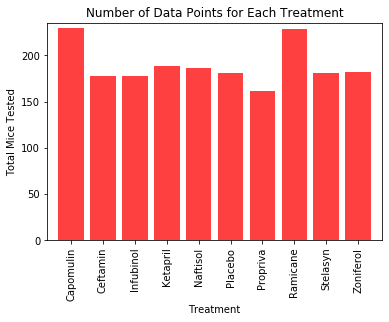

In [126]:
x_axis = np.arange(0, len(drugs_data))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Number of Data Points for Each Treatment")
plt.xlabel("Treatment")
plt.ylabel("Total Mice Tested")

plt.xlim(-0.75, len(drugs_data)-.25)
plt.ylim(0, max(number_data) + 5)

plt.bar(x_axis, number_data, facecolor="red", alpha=0.75, align="center" )
plt.xticks(tick_locations, drugs_data, rotation=90)

plt.show()

# This is the  bar plot showing number of data points for each treatment regimen using pandas

In [127]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

In [128]:
Data = {'drugs_data':drugs_data,
        'number_data':number_data
       }
Data

{'drugs_data': ['Capomulin',
  'Ceftamin',
  'Infubinol',
  'Ketapril',
  'Naftisol',
  'Placebo',
  'Propriva',
  'Ramicane',
  'Stelasyn',
  'Zoniferol'],
 'number_data': Drug Regimen
 Capomulin    230
 Ceftamin     178
 Infubinol    178
 Ketapril     188
 Naftisol     186
 Placebo      181
 Propriva     161
 Ramicane     228
 Stelasyn     181
 Zoniferol    182
 Name: Mouse ID, dtype: int64}

In [129]:
df = pd.DataFrame(Data,columns=['drugs_data','number_data'])

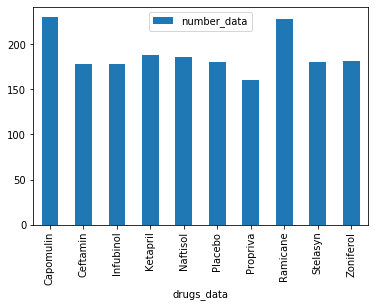

In [130]:
df.plot(x ='drugs_data', y='number_data', kind = 'bar')
plt.show()

# This is the bar plot showing number of data points for each treatment regimen using pyplot

## Pie plots

In [131]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


In [132]:
sex_table = mouse_table.groupby(['Sex']).count()
sex_table

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,935,935,935,935,935,935,935
Male,958,958,958,958,958,958,958


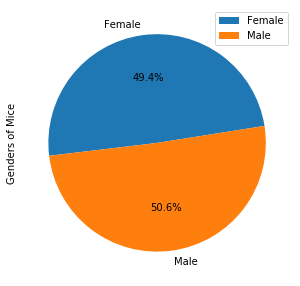

In [133]:
Data = {'Genders of Mice': sex_table["Mouse ID"]}
df = pd.DataFrame(Data,columns=['Genders of Mice'],index = ['Female', 'Male'])
df.plot.pie(y='Genders of Mice',figsize=(5, 5),autopct='%1.1f%%', startangle=9)
plt.show()
#This is the pie plot showing the distribution of female versus male mice using pandas


In [134]:
genders = ["Female", "Male"]
mice_count = sex_table["Mouse ID"]
colors = ["blue", "orange"]


In [135]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



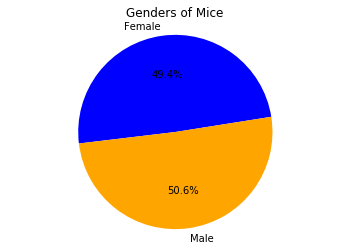

In [136]:
plt.title("Genders of Mice")
plt.pie(mice_count, labels=genders, colors=colors,
        autopct="%1.1f%%", startangle=9)
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [137]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [138]:
DrugIDT= mouse_table.groupby('Drug Regimen').mean()
DrugIDT

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989
Propriva,10.894410,27.043478,16.863354,52.322552,0.975155
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928


In [139]:
data_drug_idx= mouse_table.set_index('Drug Regimen')
data_drug_idx

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0
Ramicane,k403,Male,21,16,5,38.825898,0
Ramicane,k403,Male,21,16,10,35.014271,1
Ramicane,k403,Male,21,16,15,34.223992,1
Ramicane,k403,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
Naftisol,z969,Male,9,30,25,63.145652,2
Naftisol,z969,Male,9,30,30,65.841013,3
Naftisol,z969,Male,9,30,35,69.176246,4


In [140]:
newdf = data_drug_idx.loc['Ramicane',['Mouse ID','Timepoint','Tumor Volume (mm3)']]
print(newdf)

             Mouse ID  Timepoint  Tumor Volume (mm3)
Drug Regimen                                        
Ramicane         k403          0           45.000000
Ramicane         k403          5           38.825898
Ramicane         k403         10           35.014271
Ramicane         k403         15           34.223992
Ramicane         k403         20           32.997729
...               ...        ...                 ...
Ramicane         w678          5           43.166373
Ramicane         y449          0           45.000000
Ramicane         y449          5           45.877545
Ramicane         y449         10           46.378092
Ramicane         y449         15           44.183451

[228 rows x 3 columns]


In [141]:
DF = pd.DataFrame(newdf)
DF


,Mouse ID,Timepoint,Tumor Volume (mm3)
Drug Regimen,,,
Ramicane,k403,0,45.000000
Ramicane,k403,5,38.825898
Ramicane,k403,10,35.014271
Ramicane,k403,15,34.223992
Ramicane,k403,20,32.997729
...,...,...,...
Ramicane,w678,5,43.166373
Ramicane,y449,0,45.000000
Ramicane,y449,5,45.877545


In [142]:
#may not need
List1 = DF["Mouse ID"].values.tolist()
List2 = DF["Timepoint"].values.tolist()
List3 = DF["Tumor Volume (mm3)"].values.tolist()

In [143]:
DF2 = DF.set_index('Timepoint')
DF2

,Mouse ID,Tumor Volume (mm3)
Timepoint,,
0,k403,45.000000
5,k403,38.825898
10,k403,35.014271
15,k403,34.223992
20,k403,32.997729
...,...,...
5,w678,43.166373
0,y449,45.000000
5,y449,45.877545


In [144]:
RamiDF3 = DF2.loc[45,:]
print(RamiDF3)

          Mouse ID  Tumor Volume (mm3)
Timepoint                             
45            k403           22.050126
45            g791           29.128472
45            s508           30.276232
45            m546           30.564625
45            z578           30.638696
45            j913           31.560470
45            n364           31.095335
45            c758           33.397653
45            a644           32.978522
45            i177           33.562402
45            j989           36.134852
45            a520           38.810366
45            r811           37.225650
45            i334           36.374510
45            d251           37.311236
45            a411           38.407618
45            e662           40.659006
45            u196           40.667713
45            q597           45.220869
45            a444           43.047543


In [145]:
RamiDF4 = pd.DataFrame(RamiDF3)
RamiDF4
#These are the final tumor volumes for each mouse at timepoint 45, for the most successful treatment regimen "Ramicane"

,Mouse ID,Tumor Volume (mm3)
Timepoint,,
45,k403,22.050126
45,g791,29.128472
45,s508,30.276232
45,m546,30.564625
45,z578,30.638696
45,j913,31.560470
45,n364,31.095335
45,c758,33.397653
45,a644,32.978522


In [146]:

Ramiquartiles = RamiDF4["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Ramilowerq = Ramiquartiles[0.25]
Ramiupperq = Ramiquartiles[0.75]
Ramiiqr = Ramiupperq-Ramilowerq

print(f"The lower quartile of Ramicane Tumor Volume is: {Ramilowerq}")
print(f"The upper quartile of Ramicane Tumor Volume is: {Ramiupperq}")
print(f"The interquartile range of Ramicane Tumor Volume is: {Ramiiqr}")
print(f"The the median of Ramicane Tumor Volumes is: {Ramiquartiles[0.5]} ")

Ramilower_bound = Ramilowerq - (1.5*Ramiiqr)
Ramiupper_bound = Ramiupperq + (1.5*Ramiiqr)
print(f"Values below {Ramilower_bound} could be outliers.")
print(f"Values above {Ramiupper_bound} could be outliers.")

The lower quartile of Ramicane Tumor Volume is: 30.981175224999998
The upper quartile of Ramicane Tumor Volume is: 38.508305307499995
The interquartile range of Ramicane Tumor Volume is: 7.527130082499998
The the median of Ramicane Tumor Volumes is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


In [147]:
Rami_Upper_Outlier = []
if x in RamiDF4["Tumor Volume (mm3)"]> 49.79900043124999:
        Rami_Upper_Outlier.append(RamiDF4["Mouse ID"])
Rami_Upper_Outlier

[]

In [148]:
Rami_Lower_Outlier = []
if x in RamiDF4["Tumor Volume (mm3)"]< 19.690480101250003:
        Rami_Lower_Outlier.append(RamiDF4["Mouse ID"])
Rami_Lower_Outlier

[]

In [149]:
newdf2 = data_drug_idx.loc['Capomulin',['Mouse ID','Timepoint','Tumor Volume (mm3)']]
print(newdf2)

             Mouse ID  Timepoint  Tumor Volume (mm3)
Drug Regimen                                        
Capomulin        s185          0           45.000000
Capomulin        s185          5           43.878496
Capomulin        s185         10           37.614948
Capomulin        s185         15           38.177232
Capomulin        s185         20           36.866876
...               ...        ...                 ...
Capomulin        i557         45           47.685963
Capomulin        r157          0           45.000000
Capomulin        r157          5           45.597064
Capomulin        r157         10           46.059608
Capomulin        r157         15           46.539206

[230 rows x 3 columns]


In [150]:
CapoDF = pd.DataFrame(newdf2)
CapoDF

,Mouse ID,Timepoint,Tumor Volume (mm3)
Drug Regimen,,,
Capomulin,s185,0,45.000000
Capomulin,s185,5,43.878496
Capomulin,s185,10,37.614948
Capomulin,s185,15,38.177232
Capomulin,s185,20,36.866876
...,...,...,...
Capomulin,i557,45,47.685963
Capomulin,r157,0,45.000000
Capomulin,r157,5,45.597064


In [151]:
CapoDF2 = CapoDF.set_index('Timepoint')
CapoDF2

,Mouse ID,Tumor Volume (mm3)
Timepoint,,
0,s185,45.000000
5,s185,43.878496
10,s185,37.614948
15,s185,38.177232
20,s185,36.866876
...,...,...
45,i557,47.685963
0,r157,45.000000
5,r157,45.597064


In [152]:
CapoDF3 = CapoDF2.loc[45,:]
print(CapoDF3)

          Mouse ID  Tumor Volume (mm3)
Timepoint                             
45            s185           23.343598
45            x401           28.484033
45            m601           28.430964
45            u364           31.023923
45            y793           31.896238
45            r554           32.377357
45            m957           33.329098
45            t565           34.455298
45            i738           37.311846
45            w914           36.041047
45            g288           37.074024
45            l897           38.846876
45            b742           38.939633
45            b128           38.982878
45            j119           38.125164
45            v923           40.658124
45            g316           40.159220
45            s710           40.728578
45            l509           41.483008
45            r944           41.581521
45            i557           47.685963


In [153]:
CapoDF4 = pd.DataFrame(CapoDF3)
CapoDF4
#These are the final tumor volumes for each mouse at timepoint 45, for the second most successful treatment regimen "Capomulin"

,Mouse ID,Tumor Volume (mm3)
Timepoint,,
45,s185,23.343598
45,x401,28.484033
45,m601,28.430964
45,u364,31.023923
45,y793,31.896238
45,r554,32.377357
45,m957,33.329098
45,t565,34.455298
45,i738,37.311846


In [154]:
Capoquartiles = CapoDF4["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Capolowerq = Capoquartiles[0.25]
Capoupperq = Capoquartiles[0.75]
Capoiqr = Capoupperq-Capolowerq

print(f"The lower quartile of Capomulin Tumor Volume is: {Capolowerq}")
print(f"The upper quartile of Capomulin Tumor Volume is: {Capoupperq}")
print(f"The interquartile range of Capomulin Tumor Volume is: {Capoiqr}")
print(f"The the median of Capomulin Tumor Volumes is: {Capoquartiles[0.5]} ")

Capolower_bound = Capolowerq - (1.5*Capoiqr)
Capoupper_bound = Capoupperq + (1.5*Capoiqr)
print(f"Values below {Capolower_bound} could be outliers.")
print(f"Values above {Capoupper_bound} could be outliers.")

The lower quartile of Capomulin Tumor Volume is: 32.37735684
The upper quartile of Capomulin Tumor Volume is: 40.1592203
The interquartile range of Capomulin Tumor Volume is: 7.781863460000004
The the median of Capomulin Tumor Volumes is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [155]:
Capo_Upper_Outlier = []
if x in CapoDF4["Tumor Volume (mm3)"]> Capoupper_bound:
        Capo_Upper_Outlier.append(CapoDF4["Mouse ID"])
Capo_Upper_Outlier

[]

In [156]:
Capo_Lower_Outlier = []
if x in CapoDF4["Tumor Volume (mm3)"]< Capolower_bound:
        Capo_Lower_Outlier.append(CapoDF4["Mouse ID"])
Capo_Lower_Outlier

[]

In [157]:
newdf3 = data_drug_idx.loc['Infubinol',['Mouse ID','Timepoint','Tumor Volume (mm3)']]
print(newdf3)

             Mouse ID  Timepoint  Tumor Volume (mm3)
Drug Regimen                                        
Infubinol        a203          0           45.000000
Infubinol        a203          5           48.508468
Infubinol        a203         10           51.852437
Infubinol        a203         15           52.777870
Infubinol        a203         20           55.173336
...               ...        ...                 ...
Infubinol        z581         25           54.316407
Infubinol        z581         30           56.286750
Infubinol        z581         35           58.628399
Infubinol        z581         40           60.053740
Infubinol        z581         45           62.754451

[178 rows x 3 columns]


In [158]:
PropDF = pd.DataFrame(newdf3)
PropDF

,Mouse ID,Timepoint,Tumor Volume (mm3)
Drug Regimen,,,
Infubinol,a203,0,45.000000
Infubinol,a203,5,48.508468
Infubinol,a203,10,51.852437
Infubinol,a203,15,52.777870
Infubinol,a203,20,55.173336
...,...,...,...
Infubinol,z581,25,54.316407
Infubinol,z581,30,56.286750
Infubinol,z581,35,58.628399


In [159]:
PropDF2 = PropDF.set_index('Timepoint')
PropDF2

,Mouse ID,Tumor Volume (mm3)
Timepoint,,
0,a203,45.000000
5,a203,48.508468
10,a203,51.852437
15,a203,52.777870
20,a203,55.173336
...,...,...
25,z581,54.316407
30,z581,56.286750
35,z581,58.628399


In [160]:
PropDF3 = PropDF2.loc[45,:]
print(PropDF3)

          Mouse ID  Tumor Volume (mm3)
Timepoint                             
45            a203           67.973419
45            a251           65.525743
45            a685           66.083066
45            c139           72.226731
45            e476           62.435404
45            f345           60.918767
45            k483           66.196912
45            y163           67.685569
45            z581           62.754451


In [161]:
PropDF4 = pd.DataFrame(PropDF3)
PropDF4

,Mouse ID,Tumor Volume (mm3)
Timepoint,,
45,a203,67.973419
45,a251,65.525743
45,a685,66.083066
45,c139,72.226731
45,e476,62.435404
45,f345,60.918767
45,k483,66.196912
45,y163,67.685569
45,z581,62.754451


In [162]:
Propquartiles = PropDF4["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Proplowerq = Propquartiles[0.25]
Propupperq = Propquartiles[0.75]
Propiqr = Propupperq-Proplowerq

print(f"The lower quartile of Infubinol Tumor Volume is: {Proplowerq}")
print(f"The upper quartile of Infubinol Tumor Volume is: {Propupperq}")
print(f"The interquartile range of Infubinol Tumor Volume is: {Propiqr}")
print(f"The the median of Infubinol Tumor Volumes is: {Propquartiles[0.5]} ")

Proplower_bound = Proplowerq - (1.5*Propiqr)
Propupper_bound = Propupperq + (1.5*Propiqr)
print(f"Values below {Proplower_bound} could be outliers.")
print(f"Values above {Propupper_bound} could be outliers.")

The lower quartile of Infubinol Tumor Volume is: 62.75445141
The upper quartile of Infubinol Tumor Volume is: 67.68556862
The interquartile range of Infubinol Tumor Volume is: 4.9311172099999965
The the median of Infubinol Tumor Volumes is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


In [163]:
Prop_Upper_Outlier = []
if x in PropDF4["Tumor Volume (mm3)"]> Propupper_bound:
        Prop_Upper_Outlier.append(PropDF4["Mouse ID"])
Prop_Upper_Outlier

[]

In [164]:
Prop_Lower_Outlier = []
if x in PropDF4["Tumor Volume (mm3)"]< Proplower_bound:
        Prop_Lower_Outlier.append(PropDF4["Mouse ID"])
Prop_Lower_Outlier

[]

In [165]:
newdf4 = data_drug_idx.loc['Ceftamin',['Mouse ID','Timepoint','Tumor Volume (mm3)']]
print(newdf4)

             Mouse ID  Timepoint  Tumor Volume (mm3)
Drug Regimen                                        
Ceftamin         a275          0           45.000000
Ceftamin         a275          5           46.795257
Ceftamin         a275         10           47.371343
Ceftamin         a275         15           49.734404
Ceftamin         a275         20           50.513437
...               ...        ...                 ...
Ceftamin         y865         25           57.173538
Ceftamin         y865         30           59.033275
Ceftamin         y865         35           61.153140
Ceftamin         y865         40           63.469549
Ceftamin         y865         45           64.729837

[178 rows x 3 columns]


In [166]:
CeftDF = pd.DataFrame(newdf4)
CeftDF2 = CeftDF.set_index('Timepoint')
CeftDF3 = CeftDF2.loc[45,:]



In [167]:
CeftDF4 = pd.DataFrame(CeftDF3)
CeftDF4

,Mouse ID,Tumor Volume (mm3)
Timepoint,,
45,a275,62.999356
45,j296,61.849023
45,k210,68.923185
45,l471,67.748662
45,l661,59.851956
45,l733,64.299830
45,o287,59.741901
45,p438,61.433892
45,w151,67.527482


In [168]:
Ceftquartiles = CeftDF4["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Ceftlowerq = Ceftquartiles[0.25]
Ceftupperq = Ceftquartiles[0.75]
Ceftiqr = Ceftupperq-Ceftlowerq

print(f"The lower quartile of Ceftamin Tumor Volume is: {Ceftlowerq}")
print(f"The upper quartile of Ceftamin Tumor Volume is: {Ceftupperq}")
print(f"The interquartile range of Ceftamin Tumor Volume is: {Ceftiqr}")
print(f"The the median of Ceftamin Tumor Volumes is: {Ceftquartiles[0.5]} ")

Ceftlower_bound = Ceftlowerq - (1.5*Ceftiqr)
Ceftupper_bound = Ceftupperq + (1.5*Ceftiqr)
print(f"Values below {Ceftlower_bound} could be outliers.")
print(f"Values above {Ceftupper_bound} could be outliers.")

The lower quartile of Ceftamin Tumor Volume is: 61.43389223
The upper quartile of Ceftamin Tumor Volume is: 67.52748237
The interquartile range of Ceftamin Tumor Volume is: 6.093590140000003
The the median of Ceftamin Tumor Volumes is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


In [169]:
Ceft_Upper_Outlier = []
if x in CeftDF4["Tumor Volume (mm3)"]> Ceftupper_bound:
        Ceft_Upper_Outlier.append(CeftDF4["Mouse ID"])
Ceft_Upper_Outlier

[]

In [170]:
Ceft_Lower_Outlier = []
if x in CeftDF4["Tumor Volume (mm3)"]< Ceftlower_bound:
        Ceft_Lower_Outlier.append(CeftDF4["Mouse ID"])
Ceft_Lower_Outlier

[]

In [171]:
#Don't need
MouseIDRami = []
FinalTVRami = []
for x in DF["Timepoint"]:
        if x == 45:
            MouseIDRami.append(DF["Mouse ID"])
            FinalTVRami.append(DF["Tumor Volume (mm3)"])
    

        

MouseIDRami


[Drug Regimen
 Ramicane    k403
 Ramicane    k403
 Ramicane    k403
 Ramicane    k403
 Ramicane    k403
             ... 
 Ramicane    w678
 Ramicane    y449
 Ramicane    y449
 Ramicane    y449
 Ramicane    y449
 Name: Mouse ID, Length: 228, dtype: object,
 Drug Regimen
 Ramicane    k403
 Ramicane    k403
 Ramicane    k403
 Ramicane    k403
 Ramicane    k403
             ... 
 Ramicane    w678
 Ramicane    y449
 Ramicane    y449
 Ramicane    y449
 Ramicane    y449
 Name: Mouse ID, Length: 228, dtype: object,
 Drug Regimen
 Ramicane    k403
 Ramicane    k403
 Ramicane    k403
 Ramicane    k403
 Ramicane    k403
             ... 
 Ramicane    w678
 Ramicane    y449
 Ramicane    y449
 Ramicane    y449
 Ramicane    y449
 Name: Mouse ID, Length: 228, dtype: object,
 Drug Regimen
 Ramicane    k403
 Ramicane    k403
 Ramicane    k403
 Ramicane    k403
 Ramicane    k403
             ... 
 Ramicane    w678
 Ramicane    y449
 Ramicane    y449
 Ramicane    y449
 Ramicane    y449
 Name: Mouse ID, 

In [172]:
#data_drug_idx1= data_drug_idx.set_index('Mouse ID')
#data_drug_idx1

In [173]:
#Average_mouse= mouse_table.groupby(['Mouse ID']).mean()
#Average_mouse

In [174]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

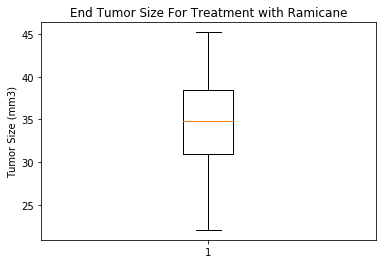

In [175]:
Ramitumorsize = RamiDF4['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
ax1.set_title('End Tumor Size For Treatment with Ramicane')
ax1.set_ylabel('Tumor Size (mm3)')
ax1.boxplot(Ramitumorsize)
plt.show()

In [176]:
Ramitumorsize

Timepoint
45    22.050126
45    29.128472
45    30.276232
45    30.564625
45    30.638696
45    31.560470
45    31.095335
45    33.397653
45    32.978522
45    33.562402
45    36.134852
45    38.810366
45    37.225650
45    36.374510
45    37.311236
45    38.407618
45    40.659006
45    40.667713
45    45.220869
45    43.047543
Name: Tumor Volume (mm3), dtype: float64

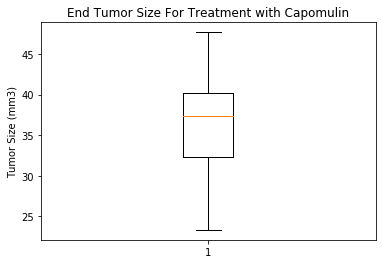

In [177]:
Capotumorsize = CapoDF4['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
ax1.set_title('End Tumor Size For Treatment with Capomulin')
ax1.set_ylabel('Tumor Size (mm3)')
ax1.boxplot(Capotumorsize)
plt.show()

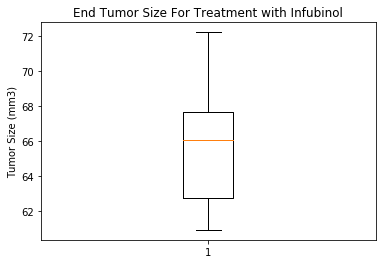

In [178]:
Infutumorsize = PropDF4['Tumor Volume (mm3)']


fig1, ax1 = plt.subplots()
ax1.set_title('End Tumor Size For Treatment with Infubinol')
ax1.set_ylabel('Tumor Size (mm3)')
ax1.boxplot(Infutumorsize)
plt.show()

In [179]:
Cefttumorsize = CeftDF4['Tumor Volume (mm3)']

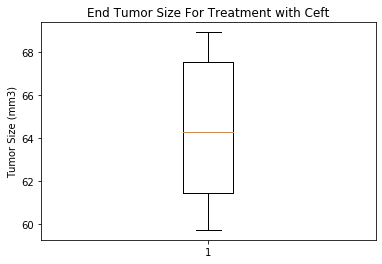

In [180]:


fig1, ax1 = plt.subplots()
ax1.set_title('End Tumor Size For Treatment with Ceft')
ax1.set_ylabel('Tumor Size (mm3)')
ax1.boxplot(Cefttumorsize)
plt.show()

In [181]:
x1 = Ramitumorsize;
x2 = Capotumorsize;
x3 = Infutumorsize;
x4 = Cefttumorsize;
x = [x1, x2, x3, x4];

In [182]:

#don't need
g1 = str("Ramiturmorsize");
g2 = str("Capotumorsize");
g3 = str("Proptumorsize");
g4 = str("Cefttumorsize");
g = [g1, g2, g3, g4];

{'whiskers': [<matplotlib.lines.Line2D at 0x264ab941a20>,
 'caps': [<matplotlib.lines.Line2D at 0x264ab533208>,
 'boxes': [<matplotlib.lines.Line2D at 0x264ab941048>,
 'medians': [<matplotlib.lines.Line2D at 0x264ab8e6c18>,
 'fliers': [<matplotlib.lines.Line2D at 0x264ab947a58>,
 'means': []}

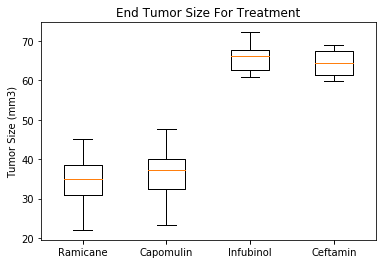

In [183]:

drugs = ["x","Ramicane","Capomulin", "Infubinol","Ceftamin"]
x_axis2 = np.arange(0, len(drugs))
tick_locations2 = []
for x in x_axis:
    tick_locations2.append(x)


fig1, ax1 = plt.subplots()
ax1.set_title('End Tumor Size For Treatment')
ax1.set_ylabel('Tumor Size (mm3)')
plt.xticks(tick_locations2, drugs, rotation=0)
plt.boxplot([x1,x2,x3,x4])



## Line and scatter plots

In [184]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [337]:
newdf6 = CapoDF.set_index('Mouse ID')
newdf6

newdf5 = newdf6.loc['s185',['Timepoint','Tumor Volume (mm3)']]
print(newdf5)

          Timepoint  Tumor Volume (mm3)
Mouse ID                               
s185              0           45.000000
s185              5           43.878496
s185             10           37.614948
s185             15           38.177232
s185             20           36.866876
s185             25           33.949940
s185             30           32.959671
s185             35           28.328531
s185             40           25.472143
s185             45           23.343598


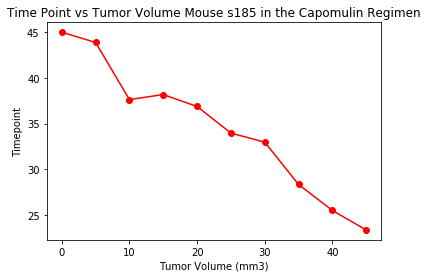

In [357]:
plt.title("Time Point vs Tumor Volume Mouse s185 in the Capomulin Regimen")
plt.ylabel("Timepoint")
plt.xlabel("Tumor Volume (mm3)")
plt.plot(newdf5['Timepoint'], newdf5['Tumor Volume (mm3)'], marker="o", color="red")
plt.show()

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [346]:
newdf7 = data_drug_idx.loc['Capomulin',['Weight (g)','Tumor Volume (mm3)']]
print(newdf7)

              Weight (g)  Tumor Volume (mm3)
Drug Regimen                                
Capomulin             17           45.000000
Capomulin             17           43.878496
Capomulin             17           37.614948
Capomulin             17           38.177232
Capomulin             17           36.866876
...                  ...                 ...
Capomulin             24           47.685963
Capomulin             25           45.000000
Capomulin             25           45.597064
Capomulin             25           46.059608
Capomulin             25           46.539206

[230 rows x 2 columns]


In [347]:
CapoWeightTAve= newdf7.groupby('Weight (g)').mean()
CapoWeightTAve

,Tumor Volume (mm3)
Weight (g),
15,36.182040
17,37.214133
19,41.182391
20,39.141053
21,42.088700
22,43.288490
23,43.341051
24,44.805810
25,44.062109


In [353]:
weightlist = CapoWeightTAve.index.values.tolist()  
weightlist

[15, 17, 19, 20, 21, 22, 23, 24, 25]

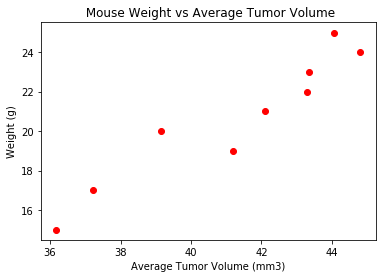

In [358]:
plt.title(" Mouse Weight vs Average Tumor Volume for The Capomulin Regimen")
plt.ylabel("Weight (g)")
plt.xlabel("Average Tumor Volume (mm3)")
plt.scatter( CapoWeightTAve['Tumor Volume (mm3)'],weightlist, marker="o", color="red")
plt.show()

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

In [360]:
correlation = st.pearsonr(CapoWeightTAve['Tumor Volume (mm3)'],weightlist)
print(f"The correlation between mouse weight and average tumor volume for the Capomulin Regimen is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume for the Capomulin Regimen is 0.95


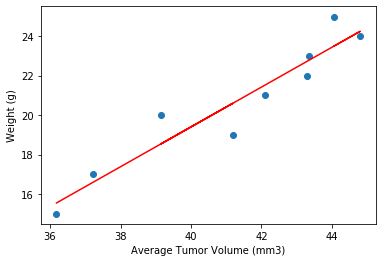

In [379]:
x_values = CapoWeightTAve['Tumor Volume (mm3)']
y_values = weightlist
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Weight (g)')


plt.show('north')